# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [1]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 59 (delta 18), reused 35 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 4.99 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

Dimensions of data: 30478 observations, 13 variables
Variables: Host ID, Host Since, Name, Neighbourhood, Property Type, Review Score Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, Review Scores Rating

  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

Most common rentals available are apartments, houses, and lofts. For private rooms, bed and breakfast, castle, chalet, dorm, house, hut, other, tent, and treehouse are more common than renting the entire property.

  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

Yes, the data is very skewed to the left with many outliers. The log transformation helps fix the scaling by expanding the small values and shrinking the large ones resulting in a more normally distrubted Price variable.

  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

As the number of beds increase, average price and standard deviation relatively increases

  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

Entire home/apt tends to be more expensive followed up shared room then private room.

Renting the entire home/apt of 'Other' property types have the highest prices on average at $290.80 and highest standard deviation at 273.53.

The median appears to be a more reliable estimate of central tendency because it isn't as affected by extreme outliers.

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

The data is mainly distributed at 1-3 bed rentals. As the beds increase, the number of observations become rarer.
The plots from 5 and 6 place more emphasize on the outliers, while the joint plot reveals the distribution of the data better.


In [48]:
#1
df = pd.read_csv('/content/EDA/assignment/data/airbnb_hw.csv')

In [47]:
#2
print(df.shape)
df.head()

(30478, 15)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Price_na,Price_impute
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN,False,145.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN,False,37.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN,False,28.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN,False,199.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0,False,549.0


In [9]:
#3
pd.crosstab(df['Room Type'], df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


In [52]:
#4 - Cleaning Price
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
# Create a missing dummy:
df['Price_na'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null
# Compute the value to impute, in this case the median:
impute_value = df['Price'].median()
# Impute the median of the non-missing data:
df['Price_impute'] = df['Price'].fillna(impute_value)
df['Price_impute'].unique()

array([145.,  37.,  28., 199., 549., 149., 250.,  90., 270., 290., 170.,
        59.,  49.,  68., 285.,  75., 100., 150., 700., 125., 175.,  40.,
        89.,  95.,  99., 499., 120.,  79., 110., 180., 143., 230., 350.,
       135.,  85.,  60.,  70.,  55.,  44., 200., 165., 115.,  74.,  84.,
       129.,  50., 185.,  80., 190., 140.,  45.,  65., 225., 600., 109.,
        73., 240.,  72., 105., 155., 160.,  42., 132., 117., 295., 280.,
       159., 107.,  69., 239., 220., 399., 130., 375., 585., 275., 139.,
       260.,  35., 133., 300., 289., 179.,  98., 195.,  29.,  27.,  39.,
       249., 192., 142., 169., 131., 138., 113., 122., 329., 101., 475.,
       238., 272., 308., 126., 235., 315., 248., 128.,  56., 207., 450.,
       215., 210., 385., 445., 136., 247., 118.,  77.,  76.,  92., 198.,
       205., 299., 222., 245., 104., 153., 349., 114., 320., 292., 226.,
       420., 500., 325., 307.,  78., 265., 108., 123., 189.,  32.,  58.,
        86., 219., 800., 335.,  63., 229., 425.,  6

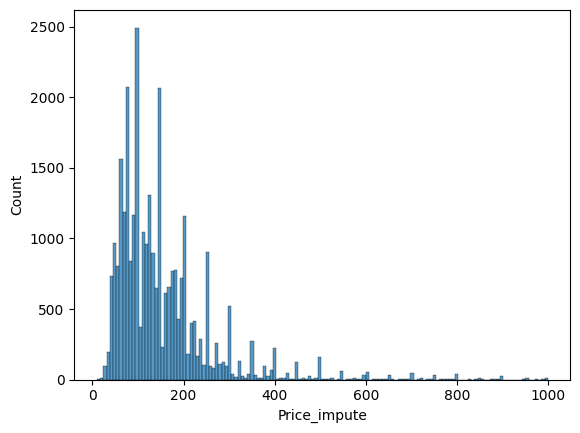

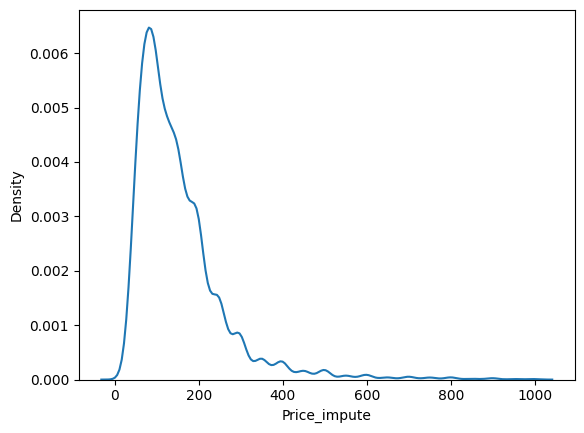

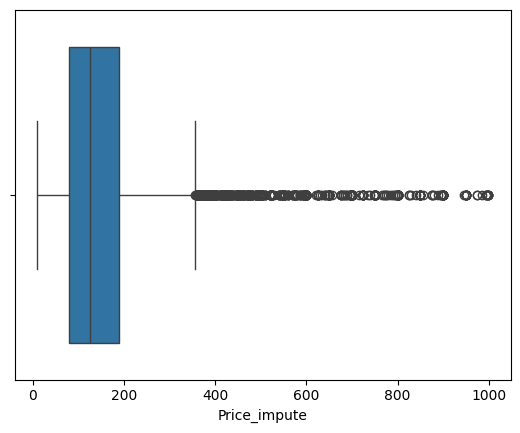

count    30478.000000
mean       153.188628
std        108.593716
min         10.000000
25%         80.000000
50%        125.000000
75%        190.000000
max        999.000000
Name: Price_impute, dtype: float64


In [57]:
#4 - Price graphs
sns.histplot(df['Price_impute'])
plt.show()
sns.kdeplot(df['Price_impute'])
plt.show()
sns.boxplot(data=df, x='Price_impute')
plt.show()
print(df['Price_impute'].describe())

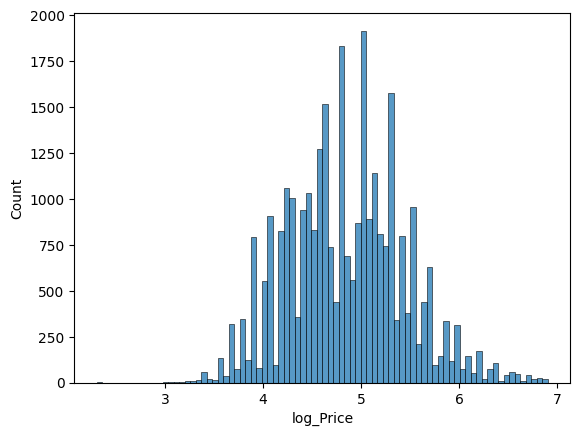

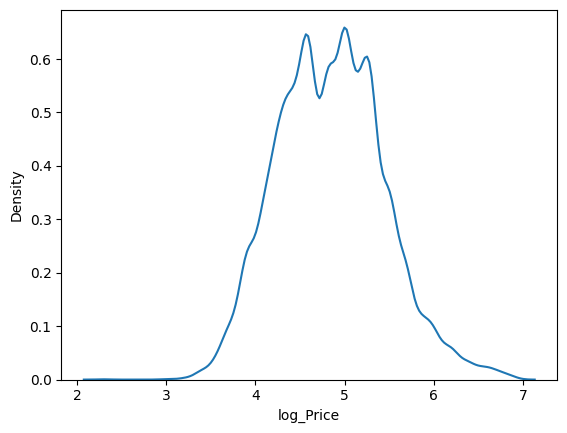

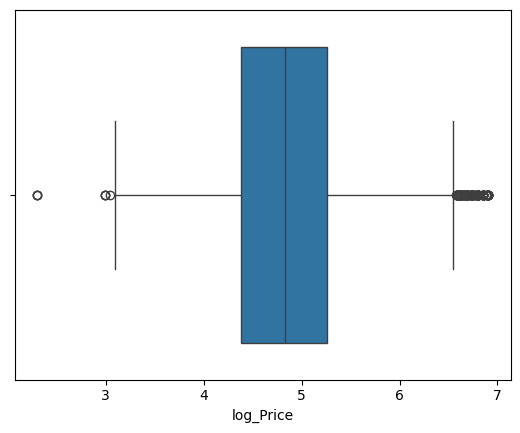

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: log_Price, dtype: float64


In [58]:
#4 - log Price graphs
df['log_Price'] = np.log(df['Price'])
sns.histplot(df['log_Price'])
plt.show()
sns.kdeplot(df['log_Price'])
plt.show()
sns.boxplot(data=df, x='log_Price')
plt.show()
print(df['log_Price'].describe())

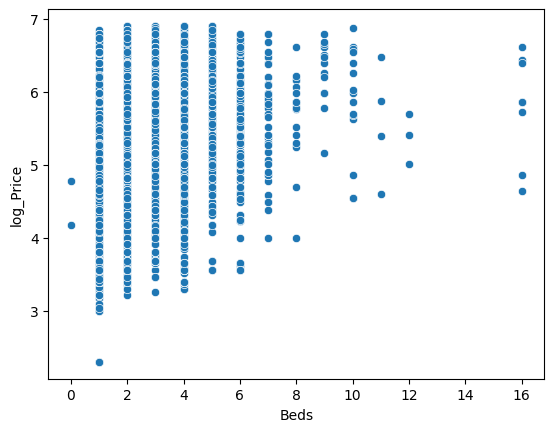

log_Price                                                              \
         count      mean       std       min       25%       50%       75%   
Beds                                                                         
0.0        2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0    20307.0  4.682084  0.527569  2.302585  4.317488  4.605170  5.043425   
2.0     6561.0  5.077679  0.546961  3.218876  4.744932  5.075174  5.416100   
3.0     2029.0  5.297638  0.572851  3.258097  4.941642  5.298317  5.700444   
4.0      766.0  5.438240  0.666451  3.295837  5.010635  5.480639  5.896449   
5.0      274.0  5.596976  0.624868  3.555348  5.225704  5.652489  6.052089   
6.0      166.0  5.538625  0.712393  3.555348  5.212968  5.602112  5.988961   
7.0       45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0       20.0  5.674340  0.579810  4.007333  5.386655  5.826995  6.012435   
9.0       14.0  6.297723  0.444839  5.164786  6.044738  6.436951  6.620073   
10.0      15.0  5.878112  0.737968  4.553877  5.659094  5.991465  6.474005   
11.0       4.0  5.589773  0.791877  4.605170  5.196513  5.638475  6.031735   
12.0       3.0  5.376839  0.348237  5.010635  5.213368  5.416100  5.559941   
16.0       8.0  5.801986  0.722260  4.644391  5.516890  5.857933  6.407135   

                
           max  
Beds            
0.0   4.779123  
1.0   6.856462  
2.0   6.906755  
3.0   6.906755  
4.0   6.906755  
5.0   6.902743  
6.0   6.802395  
7.0   6.802395  
8.0   6.620073  
9.0   6.802395  
10.0  6.882437  
11.0  6.476972  
12.0  5.703782  
16.0  6.620073

In [64]:
#5
sns.scatterplot(data=df, x='Beds', y='log_Price')
plt.show()
df.loc[:,['Beds','log_Price']].groupby('Beds').describe()

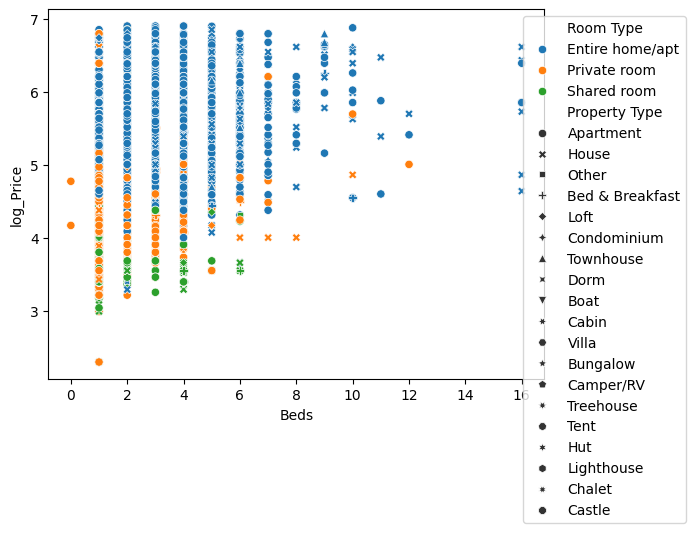

Price                                 \
                                   count        mean         std    min   
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                                               
                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.

In [68]:
#6
price_beds_scatterplot = sns.scatterplot(data=df, x='Beds', y='log_Price', hue='Room Type', style='Property Type')
sns.move_legend(price_beds_scatterplot, "upper right", bbox_to_anchor=(1.3, 1))
plt.show()

df.loc[:,['Price','Room Type','Property Type']].groupby(['Room Type','Property Type']).describe()

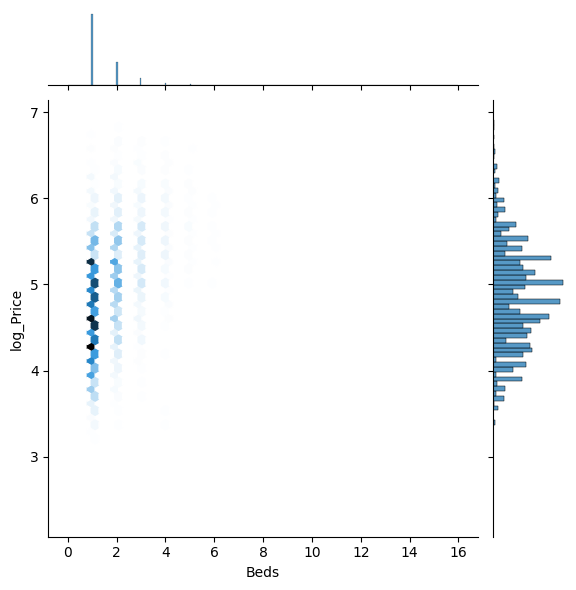

In [67]:
#7
sns.jointplot(data=df, x='Beds', y='log_Price', kind='hex')
plt.show()

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.